<a href="https://colab.research.google.com/github/SriRamK345/E-Commerce-Marketing/blob/main/EDA_and_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [501]:
# Data cleaning
import pandas as pd
import numpy as np
# Visualization / EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# remove warnings
import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [502]:
df = pd.read_csv("/content/drive/MyDrive/E-Commerce Marketing/ConsumerElectronics.csv")
df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [503]:
df.shape

(1648824, 20)

In [504]:
# Droping Duplicates
df.drop_duplicates(inplace= True,)
print(df.shape)

(1543981, 20)


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1543981 non-null  object 
 1   order_date                       1543981 non-null  object 
 2   Year                             1543981 non-null  int64  
 3   Month                            1543981 non-null  int64  
 4   order_id                         1543981 non-null  float64
 5   order_item_id                    1543981 non-null  float64
 6   gmv                              1543981 non-null  object 
 7   units                            1543981 non-null  int64  
 8   deliverybdays                    1543981 non-null  object 
 9   deliverycdays                    1543981 non-null  object 
 10  s1_fact.order_payment_type       1543981 non-null  object 
 11  sla                              1543981 non-null  int6

In [506]:
df["product_analytic_category"].unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [507]:
df["product_analytic_sub_category"].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [508]:
df["gmv"].value_counts()

gmv
999.0      23738
999        16557
169        16341
299.0      13535
1299.0     12508
           ...  
28749.0        1
33204.0        1
16420          1
10962.0        1
3225           1
Name: count, Length: 18086, dtype: int64

## Data Handling

In [509]:
# Convert 'gmv' to numeric (forcing errors to NaN if any invalid values)
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')

In [510]:
# Convert 'order_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [511]:
# Replace invalid entries ('\\N') in 'deliverybdays' and 'deliverycdays' with NaN
df['deliverybdays'] = df['deliverybdays'].replace('\\N', np.NaN)
df['deliverycdays'] = df['deliverycdays'].replace('\\N', np.NaN)

In [512]:
df.sample(10)

fsn_id          order_date  Year  Month      order_id  \
281210   ACCEB795YRSGZTMJ 2015-11-24 10:38:25  2015     11  2.451966e+15   
550456   ACCE9YWNMYD4D8MT 2016-01-12 11:41:01  2016      1  3.494342e+15   
899803   CAMDKF78RGR4PMJB 2016-03-10 05:54:20  2016      3  1.544235e+15   
1159268  ACCEGANPUVMNNRJM 2016-05-21 17:08:52  2016      5  4.606803e+15   
370424   ACCE2A792KXU3ZWR 2015-12-08 19:03:37  2015     12  2.464368e+15   
1289259  ACCEG2E2WU9CXBVV 2016-06-28 18:13:07  2016      6  2.635346e+15   
1095226  ACCE58P94S5YVBYG 2016-05-08 10:04:32  2016      5  3.595363e+15   
171032   CAME4YJ2VQJSBUJH 2015-10-22 18:23:53  2015     10  3.423735e+15   
1063229  SELDXMC3JNMTQMGV 2016-04-18 17:33:30  2016      4  2.578359e+15   
525742   ACCE32FMRBGX9BBR 2016-01-13 16:11:56  2016      1  2.495367e+15   

         order_item_id      gmv  units deliverybdays deliverycdays  \
281210    2.451966e+15   1849.0      1           NaN           NaN   
550456    3.494342e+15    414.0      1           NaN           NaN   
899803    1.544235e+15  32990.0      1           NaN           NaN   
1159268   4.606803e+15    919.0      1             6             7   
370424    2.464368e+15    599.0      1           NaN           NaN   
1289259   2.635346e+15   1235.0      1             2             2   
1095226   3.595363e+15   2140.0      1             6             7   
171032    3.423735e+15   4950.0      1           NaN           NaN   
1063229   2.578359e+15   2599.0      1             2             2   
525742    2.495367e+15   1499.0      1           NaN           NaN   

        s1_fact.order_payment_type  sla                 cust_id  \
281210                         COD    3  -9.07876766533664E+018   
550456                     Prepaid    8   2267508799711610112.0   
899803                         COD    4  -3168925622298990080.0   
1159268                        COD    9   8012589131575040000.0   
370424                         COD    4   7663005559482630144.0   
1289259                        COD    2  -6764435307891890176.0   
1095226                        COD    7   5704092155722000384.0   
171032                         COD    6   5.90870502644211E+018   
1063229                        COD    2  -8346340927351149568.0   
525742                         COD    9   7581388586143580160.0   

                        pincode product_analytic_super_category  \
281210    6.09158001568257E+018                              CE   
550456    6433448124411100160.0                              CE   
899803   -6104413808449550336.0                              CE   
1159268  -3294538647230210048.0                              CE   
370424    7686937675415940096.0                              CE   
1289259  -1391397180829120000.0                              CE   
1095226   8236371253965429760.0                              CE   
171032   -9.97211834163241E+017                              CE   
1063229   4573853686618820096.0                              CE   
525742   -1838337593687109888.0                              CE   

        product_analytic_category product_analytic_sub_category  \
281210         EntertainmentSmall                       Speaker   
550456         EntertainmentSmall                       Speaker   
899803                     Camera                        Camera   
1159268            GamingHardware               GamingAccessory   
370424         EntertainmentSmall                     HomeAudio   
1289259            GamingHardware               GamingAccessory   
1095226        EntertainmentSmall                       Speaker   
171032                     Camera                        Camera   
1063229        EntertainmentSmall                  TVVideoSmall   
525742         EntertainmentSmall                     HomeAudio   

        product_analytic_vertical  product_mrp  product_procurement_sla  
281210              MobileSpeaker         3199                        1  
550456              MobileSpeaker         1425   

In [513]:
df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4038
units                                    0
deliverybdays                      1208179
deliverycdays                      1208178
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical                0
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [514]:
df.dropna(subset=['gmv'], inplace=True)

In [515]:
df["deliverybdays"].value_counts().head(10)

deliverybdays
4     62056
5     60591
3     53686
6     48650
2     37512
7     25564
1     19855
8     12461
9      5927
10     2922
Name: count, dtype: int64

In [516]:
df["deliverycdays"].value_counts().head(10)

deliverycdays
5     56412
6     51927
4     50619
3     40495
7     38452
2     28174
8     23257
1     15428
9     13533
10     7289
Name: count, dtype: int64

In [517]:
# replacing nan values with 5,6,7,8 in deliverycdays randomly
df["deliverybdays"].fillna(np.random.choice([4,5,3]), inplace=True)
df['deliverycdays'].fillna(np.random.choice([5,6,4]), inplace=True)

## Unique Values

In [518]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

Total Unique Values
fsn_id                                         21216
order_date                                   1152699
Year                                               2
Month                                             12
order_id                                     1497298
order_item_id                                1477119
gmv                                            12523
units                                             27
deliverybdays                                    143
deliverycdays                                    171
s1_fact.order_payment_type                         2
sla                                               60
cust_id                                      1253494
pincode                                        12972
product_analytic_super_category                    1
product_analytic_category                          5
product_analytic_sub_category                     14
product_analytic_vertical                         74
product_mrp                                     1929
product_procurement_sla                           17

## Data Preparation

Create ML & DL models for three product subcategories: camera accessory, home audio, and gaming accessory. Develop models at a weekly level for each sub-category.


In [519]:
sub_cat = ["CameraAccessory", "HomeAudio", "GamingAccessory"]
df_new = df[df["product_analytic_sub_category"].isin(sub_cat)]
df_new.sample(5)

fsn_id          order_date  Year  Month      order_id  \
964412  ACCE7FHXXJ9BY8ZJ 2016-04-27 00:30:10  2016      4  1.583335e+15   
809227  ACCE53FQZTN9UNPG 2016-03-05 16:31:32  2016      3  2.540306e+15   
341446  ACCD6HEGVCDHXPNQ 2015-12-09 20:55:40  2015     12  4.465299e+15   
654223  ACCDTREV54TU7YFE 2016-02-15 08:33:59  2016      2  3.523605e+15   
665441  ACCE2GVPBTJYMHGR 2016-02-20 15:54:39  2016      2  4.528191e+15   

        order_item_id     gmv  units deliverybdays deliverycdays  \
964412   1.583335e+15   270.0      1             8             9   
809227   2.540306e+15  1570.0      1             3             4   
341446   4.465299e+15   399.0      1             3             4   
654223   3.523605e+15  1130.0      1             3             4   
665441   4.528191e+15   220.0      1             3             4   

       s1_fact.order_payment_type  sla                cust_id  \
964412                    Prepaid   11 -5331034526049920000.0   
809227                    Prepaid    9  4627674189111000064.0   
341446                        COD    4  8.17742234741464E+018   
654223                        COD    6  2992468856684109824.0   
665441                        COD    5  8167163595237019648.0   

                      pincode product_analytic_super_category  \
964412  2637950109410039808.0                              CE   
809227  4471802906208880128.0                              CE   
341446  3.28302028976739E+016                              CE   
654223  6675290241042549760.0                              CE   
665441  5791294508935629824.0                              CE   

       product_analytic_category product_analytic_sub_category  \
964412            GamingHardware               GamingAccessory   
809227        EntertainmentSmall                     HomeAudio   
341446            GamingHardware               GamingAccessory   
654223            GamingHardware               GamingAccessory   
665441           CameraAccessory               CameraAccessory   

       product_analytic_vertical  product_mrp  product_procurement_sla  
964412                   GamePad          275                        3  
809227          HomeAudioSpeaker         1999                        1  
341446                   GamePad          449                       -1  
654223               GamingMouse         1370                        0  
665441                      Lens          349                        2

In [520]:
df_new.shape

(527280, 20)

## EDA

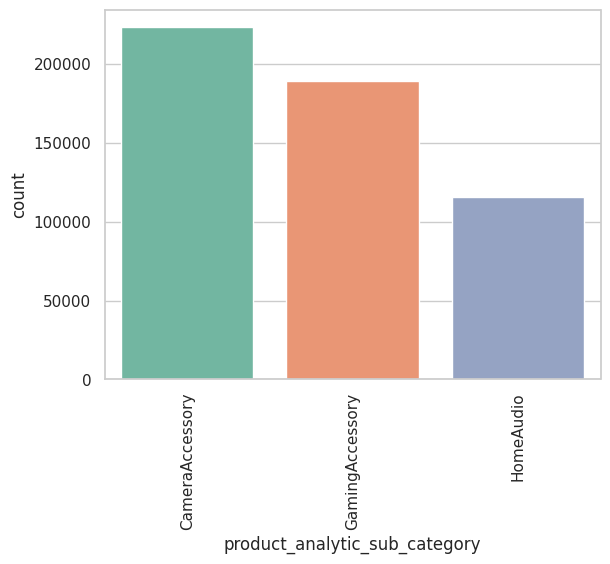

In [521]:
# product_analytic_sub_category
sns.countplot(data=df_new, x='product_analytic_sub_category', palette='Set2')
plt.xticks(rotation=90)
plt.show()

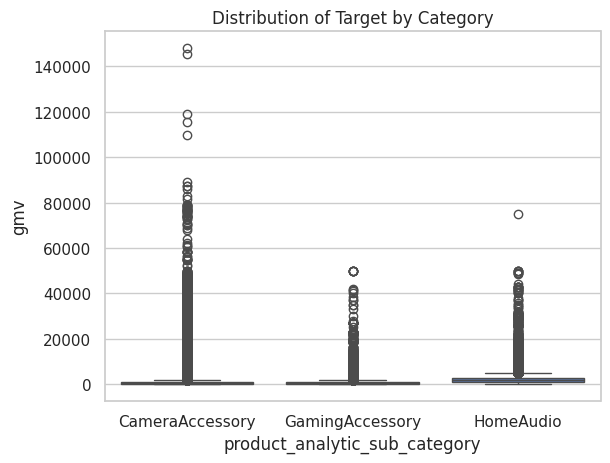

In [522]:
# Distribution of Target by Category
sns.boxplot(x='product_analytic_sub_category', y='gmv', data=df_new)
plt.title('Distribution of Target by Category')
plt.xlabel('product_analytic_sub_category')
plt.ylabel('gmv')
plt.show()

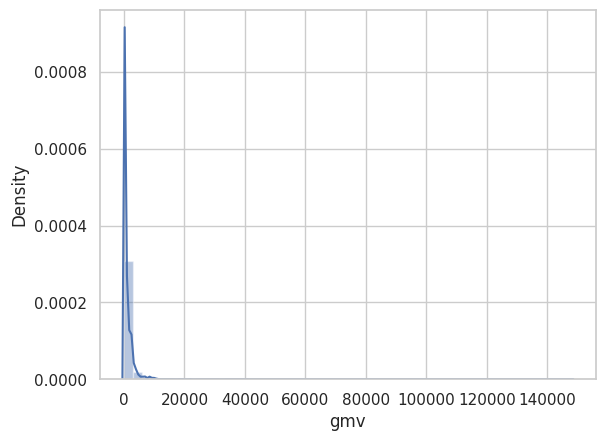

In [523]:
sns.distplot(df_new['gmv'])
plt.show()

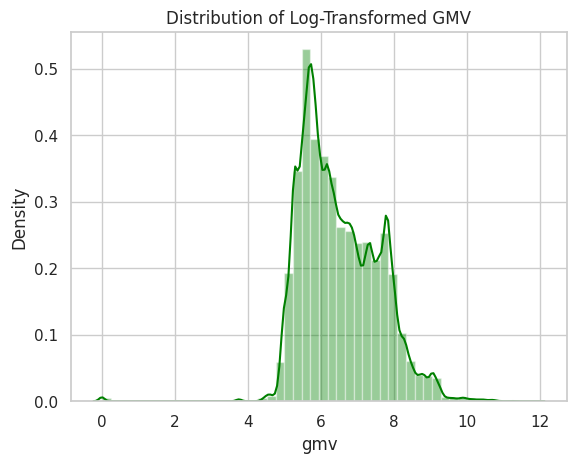

In [524]:
# Distribution of Log-Transformed GMV
sns.distplot(np.log(df_new['gmv']+1), color='green')
plt.title('Distribution of Log-Transformed GMV')
plt.show()

#### Skewness of the data suggests that the data is fairly symmetrical and positive whereas kurtosis value is < 3.

In [525]:
from scipy.stats import skew,kurtosis
print('Skewness of the gmv:',skew(np.log(df_new['gmv']+1)))
print('Excess Kurtosis of the gmv:',kurtosis(np.log(df_new['gmv']+1)))

Skewness of the gmv: 0.33060035998532206
Excess Kurtosis of the gmv: 1.2784010054026096


In [526]:
px.box(df_new, y='gmv', title='Box Plot of GMV')

In [527]:
filtered_df = df_new[df_new['gmv'] >=100000]
filtered_df.head()

fsn_id          order_date  Year  Month      order_id  \
337844   ACCCX3SGGDGTHA2C 2015-12-31 10:12:50  2015     12  4.483916e+15   
640148   ACCCX3SGGAMUVJHX 2016-02-03 15:04:07  2016      2  1.513467e+15   
640149   ACCCX3SGGAMUVJHX 2016-02-11 18:58:39  2016      2  1.520522e+15   
1071987  ACCCX3SGUFHGMYWS 2016-05-20 15:01:46  2016      5  1.605917e+15   
1241127  ACCDY4UMEU46EP5Q 2016-06-02 20:59:08  2016      6  3.617365e+15   

         order_item_id       gmv  units deliverybdays deliverycdays  \
337844    4.483916e+15  115598.0      1             3             4   
640148    1.513467e+15  145535.0      1             3             4   
640149    1.520522e+15  148050.0      1             3             4   
1071987   1.605917e+15  109990.0      1             4             5   
1241127   3.617365e+15  119000.0      1             5             6   

        s1_fact.order_payment_type  sla                cust_id  \
337844                     Prepaid    4  8.08123830053474E+018   
640148                     Prepaid    7 -7516933519112800256.0   
640149                     Prepaid    9 -6815229018062780416.0   
1071987                    Prepaid    5  4286418942037190144.0   
1241127                    Prepaid    6 -7702519487909550080.0   

                       pincode product_analytic_super_category  \
337844   4.33728142950301E+018                              CE   
640148  -3512214496557320192.0                              CE   
640149  -8083799506298859520.0                              CE   
1071987 -7782295561139069952.0                              CE   
1241127 -5922363185279490048.0                              CE   

        product_analytic_category product_analytic_sub_category  \
337844            CameraAccessory               CameraAccessory   
640148            CameraAccessory               CameraAccessory   
640149            CameraAccessory               CameraAccessory   
1071987           CameraAccessory               CameraAccessory   
1241127           CameraAccessory               CameraAccessory   

        product_analytic_vertical  product_mrp  product_procurement_sla  
337844                       Lens       125650                        4  
640148                       Lens       180000                        5  
640149                       Lens       180000                        5  
1071987                      Lens       113995                       10  
1241127                      Lens       119000                        2

In [528]:
# Filter Outliers from DataFrame
df_new.drop(filtered_df.index, inplace=True)

In [529]:
df["s1_fact.order_payment_type"].value_counts()

s1_fact.order_payment_type
COD        1111518
Prepaid     428425
Name: count, dtype: int64

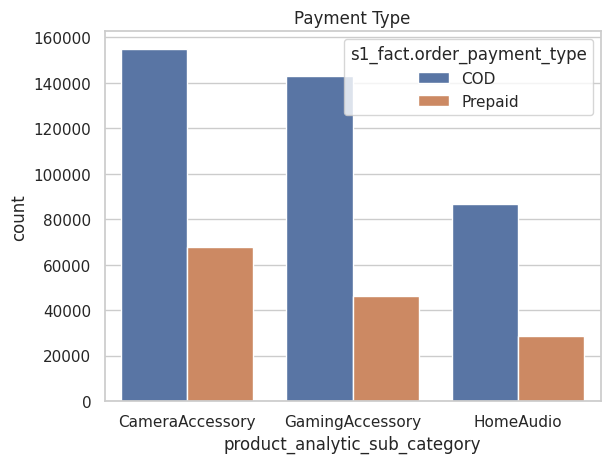

In [530]:
sns.countplot(data=df_new, x="product_analytic_sub_category", hue="s1_fact.order_payment_type")
plt.title("Payment Type")
plt.show()

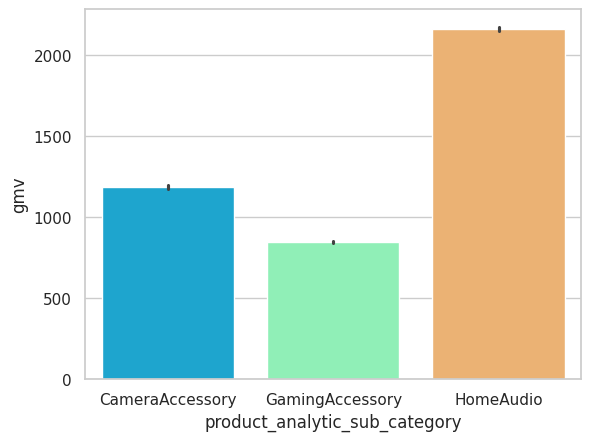

In [302]:
sns.barplot(data=df_new, x="product_analytic_sub_category", y="gmv", palette="rainbow")
plt.show()

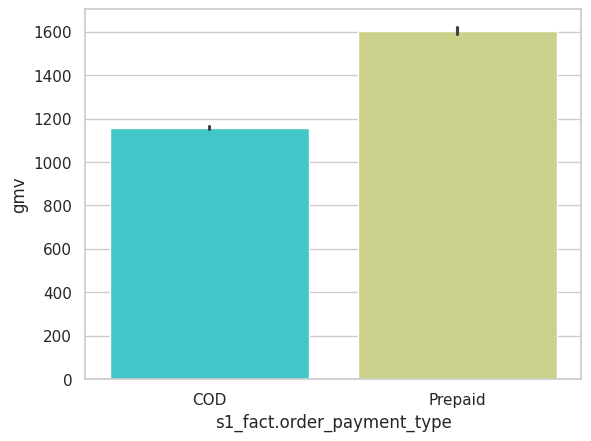

In [303]:
sns.barplot(data=df_new, x="s1_fact.order_payment_type", y="gmv", palette="rainbow")
plt.show()

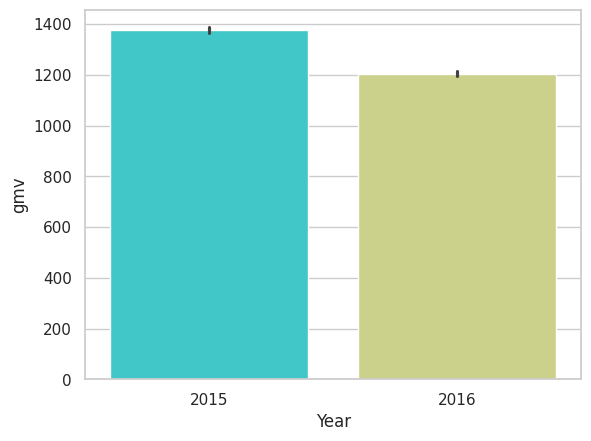

In [304]:
sns.barplot(data=df_new, x="Year", y="gmv", palette="rainbow")
plt.show()

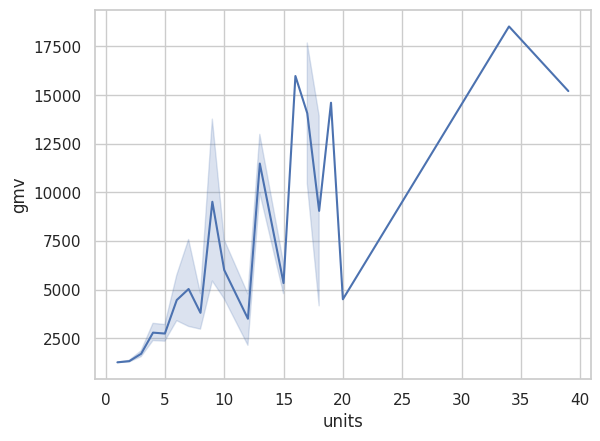

In [305]:
sns.lineplot(data=df_new, x ="units", y="gmv")
plt.show()

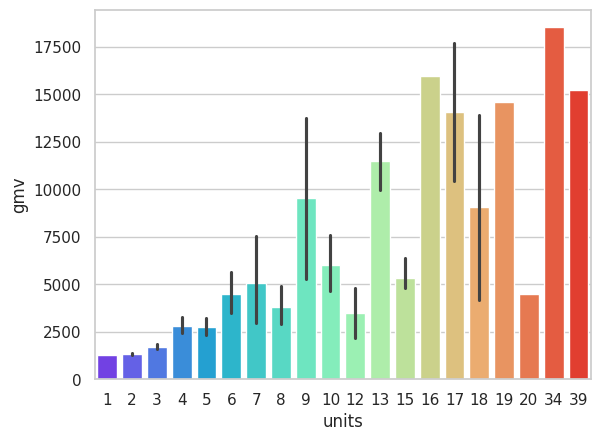

In [306]:
sns.barplot(data=df_new, x="units", y="gmv", palette="rainbow")
plt.show()

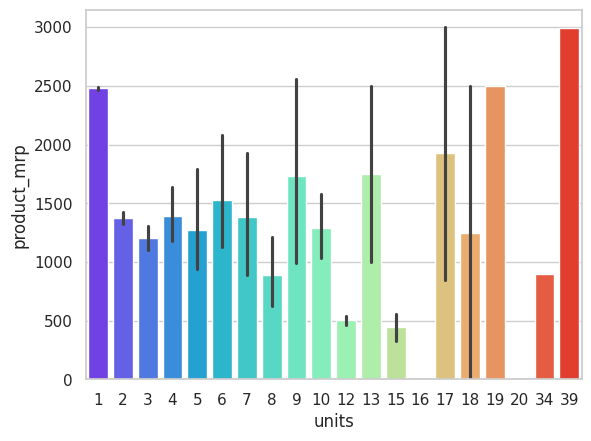

In [307]:
sns.barplot(data=df_new, x="units", y="product_mrp", palette="rainbow")
plt.show()

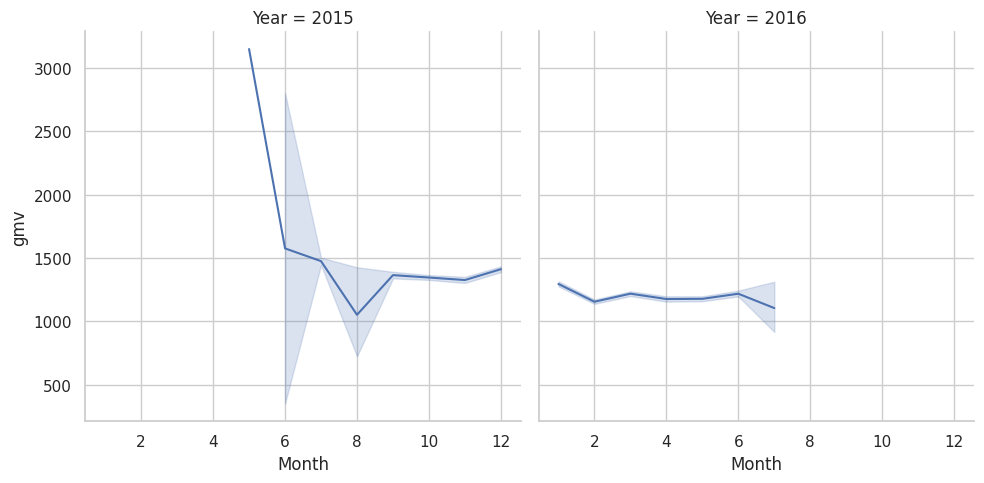

In [308]:
sns.relplot(data=df_new, x="Month", y="gmv", col="Year", kind="line")
plt.show()

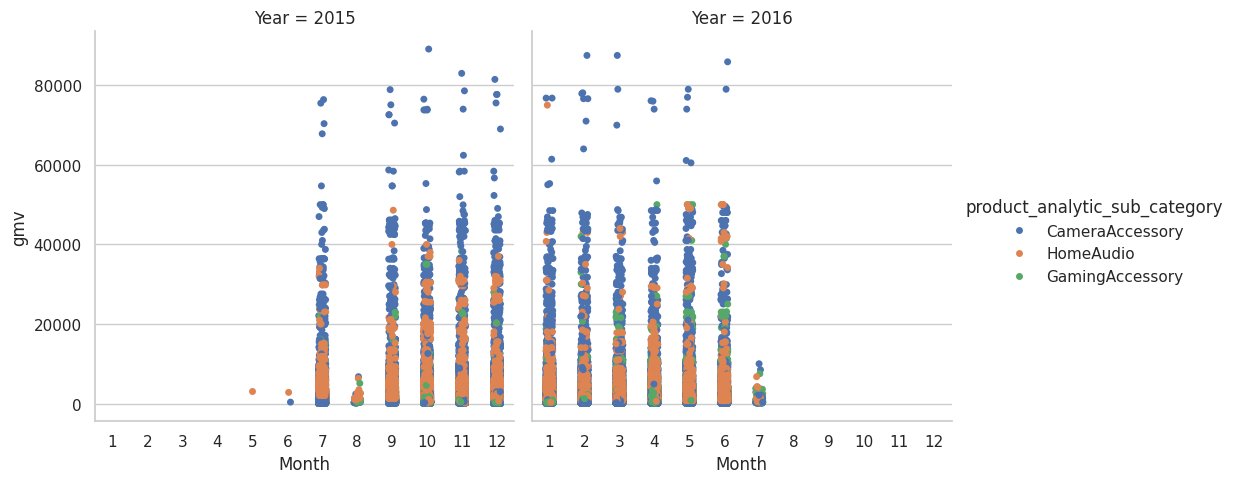

In [309]:
sns.catplot(data = df_new, x = "Month", y = "gmv", col = "Year", hue = "product_analytic_sub_category")
plt.show()

Creating a new Weekly Start Date Column

In [310]:
df_new['week_start_date'] = df_new['order_date'].dt.to_period('W').apply(lambda r: r.start_time)

In [311]:
df_new.shape

(527275, 21)

## Aggregate GMV and units sold per week for each sub-category

In [312]:
weekly_agg_data = df_new.groupby(
    ['product_analytic_sub_category', 'week_start_date']).agg(
    total_gmv=('gmv', 'sum'),
    total_units=('units', 'sum'),
    sla =('sla', 'mean')
).reset_index()

# Display a sample of the weekly aggregated data
weekly_agg_data.head()

product_analytic_sub_category week_start_date  total_gmv  total_units  \
0               CameraAccessory      2015-06-22      350.0            1   
1               CameraAccessory      2015-06-29    18196.0           28   
2               CameraAccessory      2015-07-06  4107249.0         3109   
3               CameraAccessory      2015-07-13  4748494.0         3324   
4               CameraAccessory      2015-07-20  4479476.0         3338   

        sla  
0  5.000000  
1  2.500000  
2  7.099529  
3  6.459409  
4  6.468584

In [313]:
weekly_agg_data.describe()

week_start_date     total_gmv   total_units         sla
count                            164  1.640000e+02    164.000000  164.000000
mean   2016-01-03 14:46:49.756097536  4.108184e+06   3298.689024    5.828724
min              2015-05-18 00:00:00  2.990000e+02      1.000000    1.000000
25%              2015-10-03 06:00:00  2.939064e+06   1999.750000    5.490720
50%              2016-01-04 00:00:00  4.019864e+06   3279.500000    5.851936
75%              2016-04-11 00:00:00  5.242028e+06   4500.000000    6.276850
max              2016-07-11 00:00:00  1.963669e+07  11684.000000   11.000000
std                              NaN  2.520688e+06   2059.105383    1.065830

In [314]:
weekly_agg_data.shape

(164, 5)

## Feature Engineering

1. **Pay Date Flag:** Add a flag to indicate if the week contains the 1st or 15th of the month (typically pay dates).

2. **Holiday Indicator:** Use a holiday flag to mark significant Canadian holidays (e.g., Christmas, New Year, Canada Day).

  - We’ll mark holidays based on a few common Canadian holidays during the dataset period:

    - Christmas (December 25th)
    - New Year (January 1st)
    - Canada Day (July 1st)

3. **Climate Data Integration:** Add temperature and precipitation data for Ontario by week (we could simulate this if you don't have climate data readily available).

4. **KPIs:**
 - Average_Order_Value(AOV) = Total GMV / Total Units


#### **Pay Date Flag**

In [315]:
def pay_date_flag(week_start):
    week_end = week_start + pd.Timedelta(days=6)
    if any(day in [1, 15] for day in range(week_start.day, week_end.day + 1)):
        return 1 #
    return 0

weekly_agg_data['pay_date_flag'] = weekly_agg_data['week_start_date'].apply(pay_date_flag)
weekly_agg_data.head(2)

product_analytic_sub_category week_start_date  total_gmv  total_units  sla  \
0               CameraAccessory      2015-06-22      350.0            1  5.0   
1               CameraAccessory      2015-06-29    18196.0           28  2.5   

   pay_date_flag  
0              0  
1              0

### **Load and Prepare the Climate Data**

In [316]:
# Load Ontario climate data
climate_2015 = pd.read_excel("/content/drive/MyDrive/E-Commerce Marketing/ONTARIO-2015.xlsx")
climate_2016 = pd.read_excel("/content/drive/MyDrive/E-Commerce Marketing/ONTARIO-2016.xlsx")

In [317]:
# Combine both years into a single DataFrame
climate_data = pd.concat([climate_2015, climate_2016], ignore_index=True)

In [318]:
# Ensure the 'Date' column is in datetime format
climate_data['Date/Time'] = pd.to_datetime(climate_data['Date/Time'])

In [319]:
# Create a column for the start date of the week
climate_data['week_start_date'] = climate_data['Date/Time'].dt.to_period('W').apply(lambda r: r.start_time)

In [320]:
climate_data.head(2)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015      1    1            †            0.0           NaN   
1 2015-01-02  2015      1    2            †            3.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow Flag  \
0           -8.5           NaN            -4.3  ...             NaN   
1           -3.0           NaN             0.0  ...             NaN   

   Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  \
0                0.0               NaN                0.0               NaN   
1                0.0               NaN                0.0               NaN   

   Dir of Max Gust (10s deg) Dir of Max Gust Flag  Spd of Max Gust (km/h)  \
0                        NaN                  NaN                     NaN   
1                        NaN                  NaN                     NaN   

  Spd of Max Gust Flag  week_start_date  
0                  NaN       2014-12-29  
1                  NaN       2014-12-29  

[2 rows x 28 columns]

In [321]:
# Aggregate to get the average temperature for each week
weekly_climate = climate_data.groupby('week_start_date').agg(avg_temperature=('Mean Temp (°C)', 'mean')).reset_index()

In [322]:
weekly_climate.tail()

week_start_date  avg_temperature
100      2016-11-28         6.420000
101      2016-12-05        -2.666667
102      2016-12-12        -4.875000
103      2016-12-19        -0.900000
104      2016-12-26         2.120000

#### Merge with E-commerce Data


In [323]:
# Merge the climate data with the e-commerce data on 'week_start_date'
weekly_agg_data = pd.merge(weekly_agg_data, weekly_climate, on='week_start_date', how='left')
weekly_agg_data['avg_temperature'] = weekly_agg_data['avg_temperature']
weekly_agg_data.head(2)

product_analytic_sub_category week_start_date  total_gmv  total_units  sla  \
0               CameraAccessory      2015-06-22      350.0            1  5.0   
1               CameraAccessory      2015-06-29    18196.0           28  2.5   

   pay_date_flag  avg_temperature  
0              0        20.066667  
1              0        19.728571

### **Holiday Flag**

In [324]:
holidays = pd.to_datetime(['2015-12-25', '2016-01-01', '2015-07-01', '2016-07-01'])

def holiday_flag(week_start):
    week_end = week_start + pd.Timedelta(days=6)
    if any(holiday in pd.date_range(week_start, week_end) for holiday in holidays):
        return 1
    return 0

weekly_agg_data['holiday_flag'] = weekly_agg_data['week_start_date'].apply(holiday_flag)
weekly_agg_data.head(2)

product_analytic_sub_category week_start_date  total_gmv  total_units  sla  \
0               CameraAccessory      2015-06-22      350.0            1  5.0   
1               CameraAccessory      2015-06-29    18196.0           28  2.5   

   pay_date_flag  avg_temperature  holiday_flag  
0              0        20.066667             0  
1              0        19.728571             1

### **Additional KPI**

In [325]:
weekly_agg_data['Average_Order_Value'] = np.where(weekly_agg_data['total_units'] > 0,
                                weekly_agg_data['total_gmv'] / weekly_agg_data['total_units'],0)
weekly_agg_data.head(3)

product_analytic_sub_category week_start_date  total_gmv  total_units  \
0               CameraAccessory      2015-06-22      350.0            1   
1               CameraAccessory      2015-06-29    18196.0           28   
2               CameraAccessory      2015-07-06  4107249.0         3109   

        sla  pay_date_flag  avg_temperature  holiday_flag  Average_Order_Value  
0  5.000000              0        20.066667             0           350.000000  
1  2.500000              0        19.728571             1           649.857143  
2  7.099529              0        20.100000             0          1321.083628

In [326]:
weekly_agg_data.describe().T

count                           mean  \
week_start_date        164  2016-01-03 14:46:49.756097536   
total_gmv            164.0                 4108184.476505   
total_units          164.0                    3298.689024   
sla                  164.0                       5.828724   
pay_date_flag        164.0                           0.25   
avg_temperature      161.0                      12.832795   
holiday_flag         164.0                       0.073171   
Average_Order_Value  164.0                    1360.436937   

                                     min                  25%  \
week_start_date      2015-05-18 00:00:00  2015-10-03 06:00:00   
total_gmv                          299.0            2939063.5   
total_units                          1.0              1999.75   
sla                                  1.0              5.49072   
pay_date_flag                        0.0                  0.0   
avg_temperature                -7.266667                6.075   
holiday_flag                         0.0                  0.0   
Average_Order_Value           295.666667           895.975434   

                                     50%                  75%  \
week_start_date      2016-01-04 00:00:00  2016-04-11 00:00:00   
total_gmv                      4019864.5           5242027.75   
total_units                       3279.5               4500.0   
sla                             5.851936              6.27685   
pay_date_flag                        0.0                 0.25   
avg_temperature                   12.625                 20.7   
holiday_flag                         0.0                  0.0   
Average_Order_Value          1178.633767          2058.540609   

                                     max             std  
week_start_date      2016-07-11 00:00:00             NaN  
total_gmv                     19636690.0  2520688.345757  
total_units                      11684.0     2059.105383  
sla                                 11.0         1.06583  
pay_date_flag                        1.0        0.434339  
avg_temperature                     25.6        8.871414  
holiday_flag                         1.0        0.261214  
Average_Order_Value               3149.0      625.179266

In [327]:
weekly_agg_data.fillna(weekly_agg_data["avg_temperature"].mean(), inplace=True)

In [328]:
weekly_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   product_analytic_sub_category  164 non-null    object        
 1   week_start_date                164 non-null    datetime64[ns]
 2   total_gmv                      164 non-null    float64       
 3   total_units                    164 non-null    int64         
 4   sla                            164 non-null    float64       
 5   pay_date_flag                  164 non-null    int64         
 6   avg_temperature                164 non-null    float64       
 7   holiday_flag                   164 non-null    int64         
 8   Average_Order_Value            164 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 11.7+ KB


## EDA on weekly_agg_data DataFrame

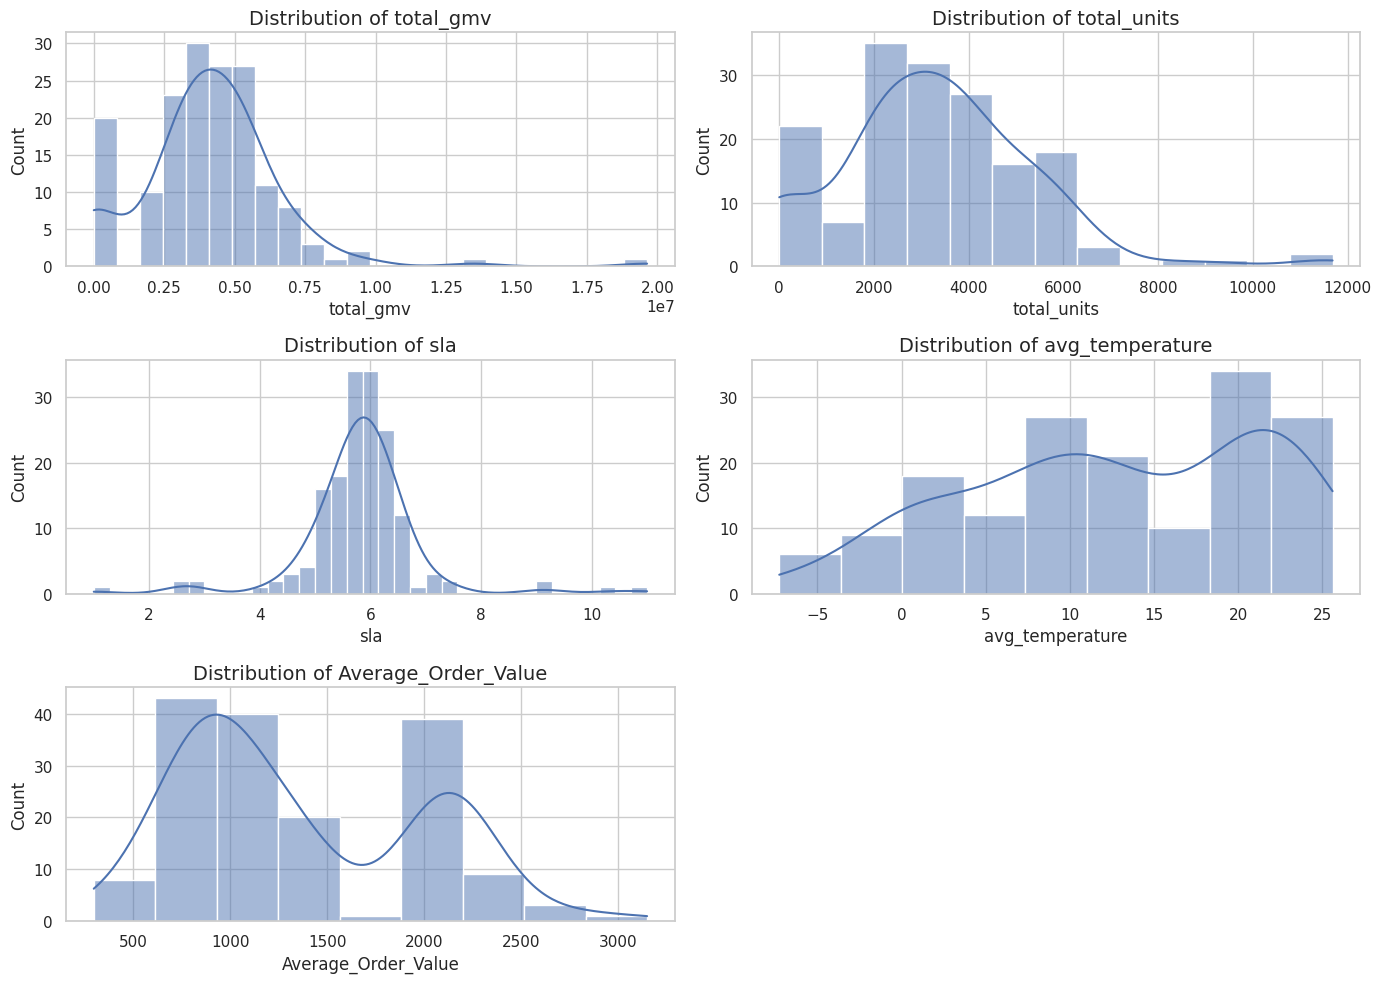

In [329]:
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = ['total_gmv', 'total_units', 'sla', 'avg_temperature', 'Average_Order_Value']

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms with KDE (Kernel Density Estimation)
for i, col in enumerate(numerical_columns):
    sns.histplot(weekly_agg_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

fig.delaxes(axes[-1]) # Removing the empty subplot
plt.tight_layout()
plt.show()

Visualizing the Distribution of Total GMV and Total Units (Square Root Transformed)

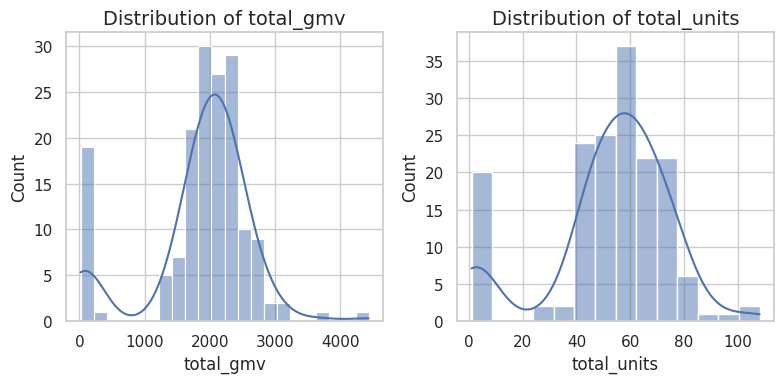

In [330]:
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = ['total_gmv', 'total_units']

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flatten()

# Plot histograms with KDE (Kernel Density Estimation)
for i, col in enumerate(numerical_columns):
    sns.histplot(np.sqrt(weekly_agg_data[col]), ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

The histograms above display the distributions of key numerical variables:

1. **Total GMV**: Skewed to the right, indicating that most of the weekly GMV values are concentrated on the lower end, but there are some extreme high values.
2. **Total Units**: Similar to total GMV, the total number of units sold also has a right-skewed distribution with most weeks seeing lower sales and a few with significantly higher sales.
3. **SLA**: Distribution is centered around a range of values, indicating varying service levels. However, there are some high SLA values.
4. **Average Temperature**: This seems to follow a normal distribution, indicating a consistent variation in temperature across weeks.
5. **Average Order Value**: This is also skewed to the right, showing that the average order values are generally low with a few instances of very high values.

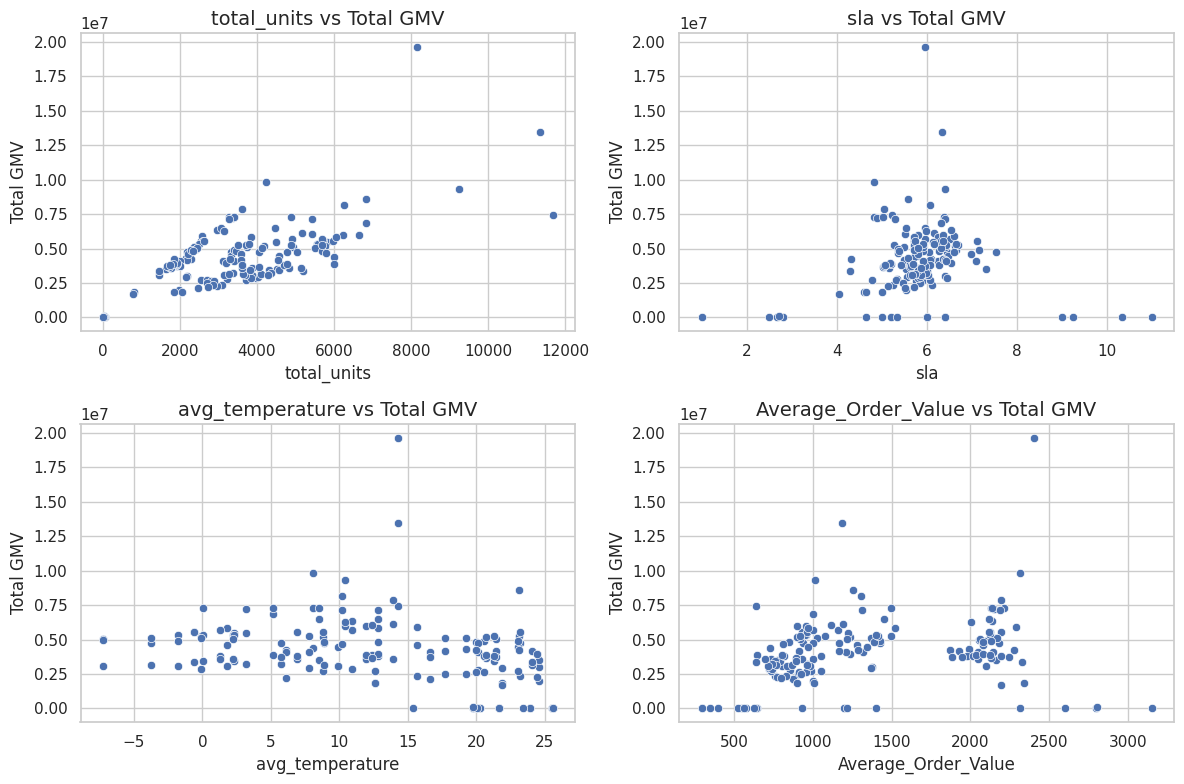

In [331]:
sns.set(style="whitegrid")
numerical_columns = ['total_units', 'sla', 'avg_temperature', 'Average_Order_Value']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=weekly_agg_data, x=col, y='total_gmv', ax=axes[i])
    axes[i].set_title(f'{col} vs Total GMV', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Total GMV')

plt.tight_layout()
plt.show()

The scatter plots provide the following insights into the relationship between the variables and **Total GMV**:

1. **Total Units vs. Total GMV**: A clear positive relationship exists. As the number of units sold increases, total GMV also increases, which is expected.
2. **SLA vs. Total GMV**: There isn't a clear trend, suggesting SLA might not have a direct linear effect on GMV.
3. **Avg Temperature vs. Total GMV**: There seems to be no significant relationship between temperature and GMV.
4. **Average Order Value vs. Total GMV**: A positive trend is observed—higher average order values correspond with higher GMV.

**Weekly GMV Trend by Product Sub-category**

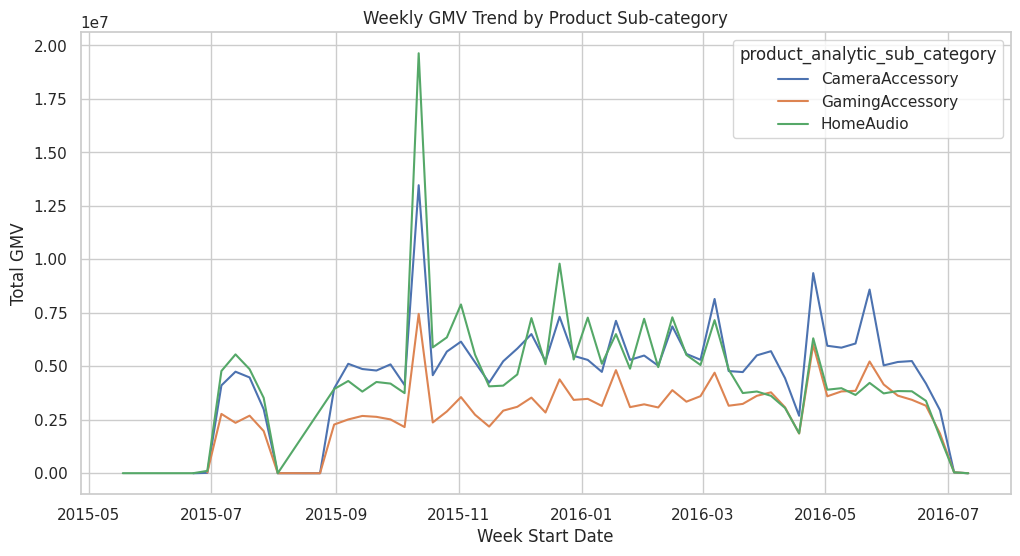

In [332]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_start_date', y='total_gmv', hue='product_analytic_sub_category', data=weekly_agg_data)
plt.title('Weekly GMV Trend by Product Sub-category')
plt.xlabel('Week Start Date')
plt.ylabel('Total GMV')
plt.show()

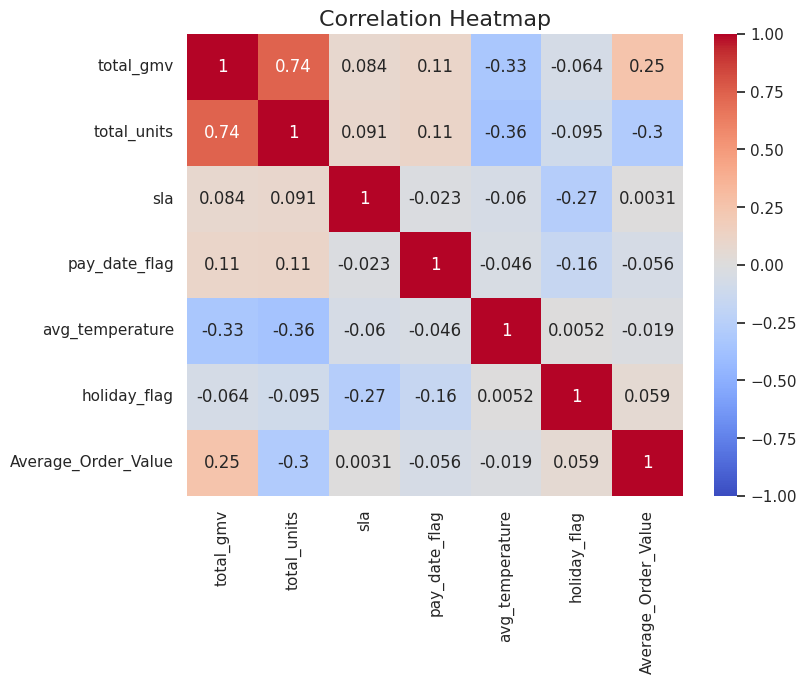

In [333]:
# Correlation Heatmap
corr_matrix = weekly_agg_data.select_dtypes(include=[np.float64, np.int64]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Exploratory Data Analysis (EDA) Insights

1. **Distribution of Weekly GMV**:
   The histogram of total GMV shows that most weeks have a GMV clustered at lower values, but there are some high-value weeks, indicating the presence of outliers or peak sales periods.

2. **Distribution of Weekly Units Sold**:
  Similar to GMV, most weeks see a low number of units sold, but a few weeks have significantly higher sales, likely driven by promotions or holidays.

3. **Bivariate Analysis: GMV vs. Units Sold**:
   - The scatterplot shows a positive relationship between units sold and GMV. As the number of units sold increases, the GMV rises, which aligns with expectations.
   - The color-coded points indicate different sub-categories, with **CameraAccessory** often showing higher GMV for fewer units compared to **GamingAccessory** and **HomeAudio**.

4. **Weekly GMV Trend by Product Sub-category**:
   - The time series plot reveals seasonal trends in sales:
     - **CameraAccessory** shows periodic spikes, possibly around specific holidays or promotional campaigns.
     - **HomeAudio** and **GamingAccessory** exhibit smaller but more frequent fluctuations.

5. **Correlation Heatmap**:
   - There is a **strong positive correlation** between GMV and units sold, confirming that these two metrics move together.
   - **Average delivery days** has a weak correlation with GMV and units sold, faster deliveries might improve sales performance.

In [334]:
weekly_agg_data.set_index('week_start_date', inplace=True)
weekly_agg_data.head()

product_analytic_sub_category  total_gmv  total_units  \
week_start_date                                                         
2015-06-22                    CameraAccessory      350.0            1   
2015-06-29                    CameraAccessory    18196.0           28   
2015-07-06                    CameraAccessory  4107249.0         3109   
2015-07-13                    CameraAccessory  4748494.0         3324   
2015-07-20                    CameraAccessory  4479476.0         3338   

                      sla  pay_date_flag  avg_temperature  holiday_flag  \
week_start_date                                                           
2015-06-22       5.000000              0        20.066667             0   
2015-06-29       2.500000              0        19.728571             1   
2015-07-06       7.099529              0        20.100000             0   
2015-07-13       6.459409              1        23.183333             0   
2015-07-20       6.468584              0        23.060000             0   

                 Average_Order_Value  
week_start_date                       
2015-06-22                350.000000  
2015-06-29                649.857143  
2015-07-06               1321.083628  
2015-07-13               1428.548135  
2015-07-20               1341.964050

In [335]:
weekly_agg_data.describe().T

count          mean           std         min  \
total_gmv            164.0  4.108184e+06  2.520688e+06  299.000000   
total_units          164.0  3.298689e+03  2.059105e+03    1.000000   
sla                  164.0  5.828724e+00  1.065830e+00    1.000000   
pay_date_flag        164.0  2.500000e-01  4.343389e-01    0.000000   
avg_temperature      164.0  1.283280e+01  8.789396e+00   -7.266667   
holiday_flag         164.0  7.317073e-02  2.612141e-01    0.000000   
Average_Order_Value  164.0  1.360437e+03  6.251793e+02  295.666667   

                              25%           50%           75%         max  
total_gmv            2.939064e+06  4.019864e+06  5.242028e+06  19636690.0  
total_units          1.999750e+03  3.279500e+03  4.500000e+03     11684.0  
sla                  5.490720e+00  5.851936e+00  6.276850e+00        11.0  
pay_date_flag        0.000000e+00  0.000000e+00  2.500000e-01         1.0  
avg_temperature      6.075000e+00  1.283280e+01  2.070000e+01        25.6  
holiday_flag         0.000000e+00  0.000000e+00  0.000000e+00         1.0  
Average_Order_Value  8.959754e+02  1.178634e+03  2.058541e+03      3149.0

In [336]:
weekly_agg_data[weekly_agg_data["total_gmv"]==19636690.0]

product_analytic_sub_category   total_gmv  total_units  \
week_start_date                                                          
2015-10-12                          HomeAudio  19636690.0         8161   

                      sla  pay_date_flag  avg_temperature  holiday_flag  \
week_start_date                                                           
2015-10-12       5.973652              1             14.3             0   

                 Average_Order_Value  
week_start_date                       
2015-10-12               2406.162235

In [337]:
weekly_agg_data.sort_index() # Sort the index before slicing
weekly_agg_data.loc["2015-10-12"]

product_analytic_sub_category     total_gmv  total_units  \
week_start_date                                                            
2015-10-12                    CameraAccessory  1.346713e+07        11338   
2015-10-12                    GamingAccessory  7.453210e+06        11684   
2015-10-12                          HomeAudio  1.963669e+07         8161   

                      sla  pay_date_flag  avg_temperature  holiday_flag  \
week_start_date                                                           
2015-10-12       6.335551              1             14.3             0   
2015-10-12       5.227587              1             14.3             0   
2015-10-12       5.973652              1             14.3             0   

                 Average_Order_Value  
week_start_date                       
2015-10-12               1187.786910  
2015-10-12                637.898804  
2015-10-12               2406.162235

### Squring gmv and units to eliminate the skwenes



In [338]:
weekly_agg_data["total_gmv_sqrt"]=np.sqrt(weekly_agg_data["total_gmv"])
weekly_agg_data["total_units_sqrt"]=np.sqrt(weekly_agg_data["total_units"])
weekly_agg_data.drop(["total_gmv", "total_units"], axis=1, inplace=True) # dropping orginal column
weekly_agg_data.head()

product_analytic_sub_category       sla  pay_date_flag  \
week_start_date                                                          
2015-06-22                    CameraAccessory  5.000000              0   
2015-06-29                    CameraAccessory  2.500000              0   
2015-07-06                    CameraAccessory  7.099529              0   
2015-07-13                    CameraAccessory  6.459409              1   
2015-07-20                    CameraAccessory  6.468584              0   

                 avg_temperature  holiday_flag  Average_Order_Value  \
week_start_date                                                       
2015-06-22             20.066667             0           350.000000   
2015-06-29             19.728571             1           649.857143   
2015-07-06             20.100000             0          1321.083628   
2015-07-13             23.183333             0          1428.548135   
2015-07-20             23.060000             0          1341.964050   

                 total_gmv_sqrt  total_units_sqrt  
week_start_date                                    
2015-06-22            18.708287          1.000000  
2015-06-29           134.892550          5.291503  
2015-07-06          2026.634896         55.758407  
2015-07-13          2179.103944         57.654141  
2015-07-20          2116.477262         57.775427

## Encoding product_analytic_sub_category column

In [339]:
from sklearn.preprocessing import OneHotEncoder

In [340]:
OE = OneHotEncoder(sparse_output=False)
one_hot_encoded= OE.fit_transform(weekly_agg_data[["product_analytic_sub_category"]])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=OE.get_feature_names_out())

In [346]:
weekly_agg_data = weekly_agg_data.reset_index()  # Reset index and assign it back
df_encoded = pd.concat([weekly_agg_data, one_hot_df], axis=1)
df_encoded.drop("product_analytic_sub_category", axis=1, inplace=True) # dropping
df_encoded.head()

week_start_date       sla  pay_date_flag  avg_temperature  holiday_flag  \
0      2015-06-22  5.000000              0        20.066667             0   
1      2015-06-29  2.500000              0        19.728571             1   
2      2015-07-06  7.099529              0        20.100000             0   
3      2015-07-13  6.459409              1        23.183333             0   
4      2015-07-20  6.468584              0        23.060000             0   

   Average_Order_Value  total_gmv_sqrt  total_units_sqrt  \
0           350.000000       18.708287          1.000000   
1           649.857143      134.892550          5.291503   
2          1321.083628     2026.634896         55.758407   
3          1428.548135     2179.103944         57.654141   
4          1341.964050     2116.477262         57.775427   

   product_analytic_sub_category_CameraAccessory  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

   product_analytic_sub_category_GamingAccessory  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   product_analytic_sub_category_HomeAudio  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      0.0

In [348]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   week_start_date                                164 non-null    datetime64[ns]
 1   sla                                            164 non-null    float64       
 2   pay_date_flag                                  164 non-null    int64         
 3   avg_temperature                                164 non-null    float64       
 4   holiday_flag                                   164 non-null    int64         
 5   Average_Order_Value                            164 non-null    float64       
 6   total_gmv_sqrt                                 164 non-null    float64       
 7   total_units_sqrt                               164 non-null    float64       
 8   product_analytic_sub_category_CameraAccessory  164 non-null 

## Scaling

In [349]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
numerical_df = df_encoded[numerical_cols]

# Initialize and fit the scaler on the numerical data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numerical_df)

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols, index=df_encoded.index)

# Concatenate the scaled numerical features with the original date/time and other features
final_df = pd.concat([df_encoded.drop(columns=numerical_cols), scaled_df], axis=1)
final_df.head()

week_start_date       sla  pay_date_flag  avg_temperature  holiday_flag  \
0      2015-06-22  0.400000            0.0         0.831643           0.0   
1      2015-06-29  0.150000            0.0         0.821356           1.0   
2      2015-07-06  0.609953            0.0         0.832657           0.0   
3      2015-07-13  0.545941            1.0         0.926471           0.0   
4      2015-07-20  0.546858            0.0         0.922718           0.0   

   Average_Order_Value  total_gmv_sqrt  total_units_sqrt  \
0             0.019042        0.000321          0.000000   
1             0.124132        0.026642          0.040073   
2             0.359375        0.455216          0.511319   
3             0.397038        0.489758          0.529020   
4             0.366693        0.475570          0.530153   

   product_analytic_sub_category_CameraAccessory  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

   product_analytic_sub_category_GamingAccessory  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   product_analytic_sub_category_HomeAudio  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      0.0

## Train Test Splitting & Modelling and Evaluation matrix

In [ ]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# evaluation_matrix

def evaluation_matrix(actual, pred):
  MAE = mean_absolute_error(actual, pred)
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(mean_squared_error(actual, pred))
  SCORE = r2_score(actual, pred)
  return print("\n","r2_score:",SCORE , "\n","MAE:", MAE, "\n","MSE",MSE, "\n","RMSE", RMSE)

### Camera accessory

In [436]:
from sklearn.model_selection import train_test_split

X_cam = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_HomeAudio","product_analytic_sub_category_GamingAccessory"], axis=1)
y_cam = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_cam, y_cam, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (131, 7)
Shape of X_test: (33, 7)
Shape of y_train: (131,)
Shape of y_test: (33,)


#### 1. Linear Regression

In [439]:
from sklearn.linear_model import LinearRegression

lr_model_c = LinearRegression()
lr_model_c.fit(X_train, y_train)
y_pred = lr_model_c.predict(X_test)

In [440]:
train_score_LRc= lr_model_c.score(X_train,y_train)
test_score_LRc= lr_model_c.score(X_test,y_test)
print("Train Score LR", train_score_LRc)
print("Test Score LR", test_score_LRc)

Train Score LR 0.9248022538965229
Test Score LR 0.937046832070705


In [441]:
evaluation_matrix(y_test, y_pred)


 r2_score: 0.937046832070705 
 MAE: 0.02516058083926615 
 MSE 0.0013930574687678972 
 RMSE 0.03732368509094322


#### 2. XGBRegressor

In [442]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_XGB = XGB_model.predict(X_test)

In [443]:
train_score_XGB= XGB_model.score(X_train,y_train)
test_score_XGB= XGB_model.score(X_test,y_test)
print("Train Score XGB", train_score_XGB)
print("Test Score XGB", test_score_XGB)

Train Score XGB 0.9999631692510764
Test Score XGB 0.9650008047145688


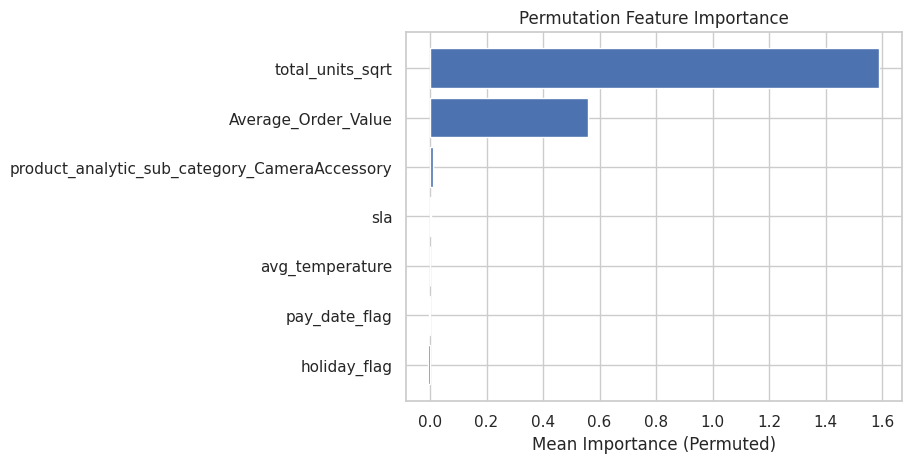

In [444]:
result = permutation_importance(lr_model_c, X_test, y_test, n_repeats=10, random_state=42)

# Plotting permutation importance
perm_sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test.shape[1]), result.importances_mean[perm_sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance')
plt.show()

### Home Audio

In [445]:
X_aud = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_CameraAccessory","product_analytic_sub_category_GamingAccessory"], axis=1)
y_aud = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_aud, y_aud, test_size=0.2, random_state=42)

#### 1. Linear Regression

In [446]:
lr_model_a = LinearRegression()
lr_model_a.fit(X_train, y_train)
y_pred = lr_model_a.predict(X_test)

train_score_LRa= lr_model_a.score(X_train,y_train)
test_score_LRa= lr_model_a.score(X_test,y_test)
print("Train Score LR", train_score_LRa)
print("Test Score LR", test_score_LRa)

Train Score LR 0.9225682253872597
Test Score LR 0.9361887601020114


In [447]:
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9361887601020114 
 MAE: 0.03214301122952441 
 MSE 0.0014120452910498758 
 RMSE 0.037577191101117124


####  2. RandomForestRegressor

In [448]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

train_score_RF= RF_model.score(X_train,y_train)
test_score_RF= RF_model.score(X_test,y_test)
print("Train Score RF", train_score_RF)
print("Test Score RF", test_score_RF)

Train Score RF 0.992070412970383
Test Score RF 0.9317765850070394


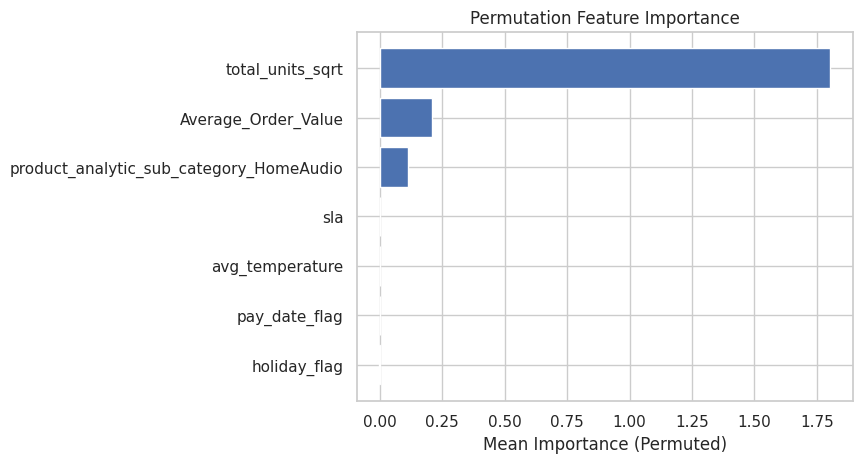

In [450]:
result = permutation_importance(lr_model_a, X_test, y_test, n_repeats=10, random_state=42)

# Plotting permutation importance
perm_sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test.shape[1]), result.importances_mean[perm_sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance')
plt.show()


### Gaming accessory

In [454]:
X_gam = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_CameraAccessory","product_analytic_sub_category_HomeAudio"], axis=1)
y_gam = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_gam, y_gam, test_size=0.2, random_state=42)

#### 1. Linear Regression

In [452]:
lr_model_g = LinearRegression()
lr_model_g.fit(X_train, y_train)
y_pred = lr_model_g.predict(X_test)

train_score_LRg= lr_model_g.score(X_train,y_train)
test_score_LRg= lr_model_g.score(X_test,y_test)
print("Train Score LR", train_score_LRg)
print("Test Score LR", test_score_LRg)

Train Score LR 0.9322019209773843
Test Score LR 0.9405334667023987


#### 2. Support Vector Machine (SVM)

In [455]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

train_score_SVM= svm_model.score(X_train,y_train)
test_score_SVM= svm_model.score(X_test,y_test)
print("Train Score SVM", train_score_SVM)
print("Test Score SVM", test_score_SVM)

Train Score SVM 0.8875436115133941
Test Score SVM 0.7468218600222112


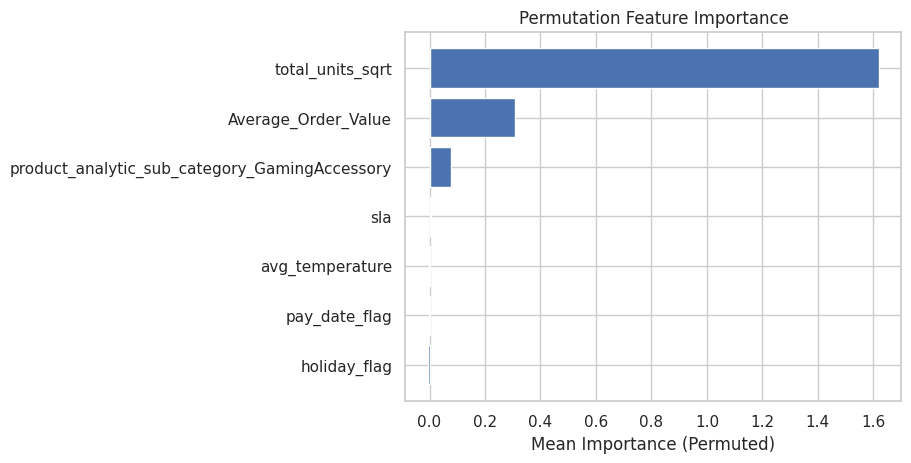

In [457]:
result = permutation_importance(lr_model_g, X_test, y_test, n_repeats=10, random_state=42)

# Plotting permutation importance
perm_sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test.shape[1]), result.importances_mean[perm_sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance')
plt.show()

The **Permutation Feature Importance** chart shows , the impact of different features on the predictive power of a machine learning model.

1. **Top Feature**:
   - The feature `total_units_sqrt` has the highest importance by a large margin. This indicates that this feature contributes the most to the model's predictions.

2. **Other Important Features**:
   - Features like `product_analytic_sub_category_HomeAudio`,`product_analytic_sub_category_CameraAccessory` and `product_analytic_sub_category_GamingAccessory` have some importance, but they are much lower than `total_units_sqrt`. These represent the sub-categories of products and seem to have some impact.
   - `Average_Order_Value` also plays a role, though it is less impactful than the top features.

3. **Less Important Features**:
   - `sla` (possibly service-level agreement or delivery time), and `avg_temperature` have minimal importance.
   - Features like `pay_date_flag` and `holiday_flag` seem to have very little to no impact on the model, as indicated by the near-zero permutation importance.

# Deep Learning

## 1. Import necessary libraries

In [582]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

## 2. Define the model

In [583]:
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with 1 neuron for regression
    ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

## 3. Prepare the data for CameraAccessory

In [584]:
X_cam = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_HomeAudio","product_analytic_sub_category_GamingAccessory"], axis=1)
y_cam = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_cam, y_cam, test_size=0.2, random_state=42)

In [585]:
input_shape = X_train.shape[1:]  # Input shape for the model
model_cam = build_model(input_shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

# Train the model
history_cam = model_cam.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, verbose=1,callbacks=[early_stopping])

# Evaluate the model
loss_cam, mae_cam, mse_cam = model_cam.evaluate(X_test, y_test, verbose=0)
print("CameraAccessory - Testing set Mean Abs Error: {:5.2f} ".format(mae_cam))
print("CameraAccessory - Testing set Mean Squared Error: {:5.2f}".format(mse_cam))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.3609 - mae: 0.5541 - mse: 0.3609 - val_loss: 0.1417 - val_mae: 0.3613 - val_mse: 0.1417
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1683 - mae: 0.3693 - mse: 0.1683 - val_loss: 0.0483 - val_mae: 0.2142 - val_mse: 0.0483
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0735 - mae: 0.2478 - mse: 0.0735 - val_loss: 0.0177 - val_mae: 0.1001 - val_mse: 0.0177
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0472 - mae: 0.1777 - mse: 0.0472 - val_loss: 0.0232 - val_mae: 0.1020 - val_mse: 0.0232
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0535 - mae: 0.1706 - mse: 0.0535 - val_loss: 0.0255 - val_mae: 0.1106 - val_mse: 0.0255
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0437 - mae: 0.1569 - mse: 0.0437 - val_loss: 0.0163 - val_mae: 0.0819 - val_mse: 0.0163
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0280 - mae: 0.1267 - mse: 0.0280 - val_loss: 

In [586]:
# Define a custom scoring function for Keras models
def keras_model_scorer(model, X, y):
    y_pred = model.predict(X)
    return -mean_squared_error(y, y_pred)  # Negative MSE for scoring

Calculating Permutation Importance for CameraAccessory...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

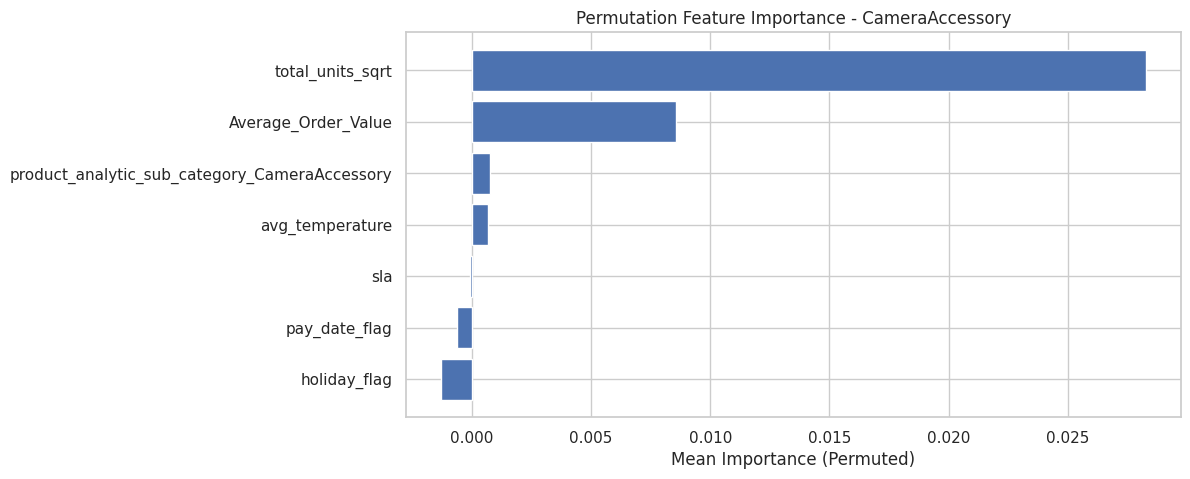

In [587]:
# 1. CameraAccessory (model_cam)
print("Calculating Permutation Importance for CameraAccessory...")
result_cam = permutation_importance(
    model_cam,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring=keras_model_scorer
)

# Plotting
perm_sorted_idx_cam = result_cam.importances_mean.argsort()
plt.figure(figsize=(10, 5))
plt.barh(range(X_test.shape[1]), result_cam.importances_mean[perm_sorted_idx_cam])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx_cam])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance - CameraAccessory')
plt.show()

## 4. Prepare the data for HomeAudio

In [588]:
X_aud = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_CameraAccessory","product_analytic_sub_category_GamingAccessory"], axis=1)
y_aud = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_aud, y_aud, test_size=0.2, random_state=42)

In [589]:
input_shape = X_train.shape[1:]  # Input shape for the model
model_aud = build_model(input_shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history_aud = model_aud.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, verbose=1,callbacks=[early_stopping])

# Evaluate the model
loss_aud, mae_aud, mse_aud = model_aud.evaluate(X_test, y_test, verbose=0)
print("HomeAudio - Testing set Mean Abs Error: {:.2f} ".format(mae_aud))
print("HomeAudio - Testing set Mean Squared Error: {:.2f}".format(mse_aud))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0599 - mae: 0.2118 - mse: 0.0599 - val_loss: 0.0186 - val_mae: 0.0963 - val_mse: 0.0186
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0423 - mae: 0.1545 - mse: 0.0423 - val_loss: 0.0114 - val_mae: 0.0772 - val_mse: 0.0114
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0382 - mae: 0.1529 - mse: 0.0382 - val_loss: 0.0132 - val_mae: 0.0995 - val_mse: 0.0132
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0349 - mae: 0.1580 - mse: 0.0349 - val_loss: 0.0104 - val_mae: 0.0854 - val_mse: 0.0104
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0265 - mae: 0.1317 - mse: 0.0265 - val_loss: 0.0058 - val_mae: 0.0566 - val_mse: 0.0058
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - mae: 0.1250 - mse: 0.0243 - val_loss: 0.0066 - val_mae: 0.0577 - val_mse: 0.0066
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0253 - mae: 0.1246 - mse: 0.0253 - val_loss:

Calculating Permutation Importance for HomeAudio...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

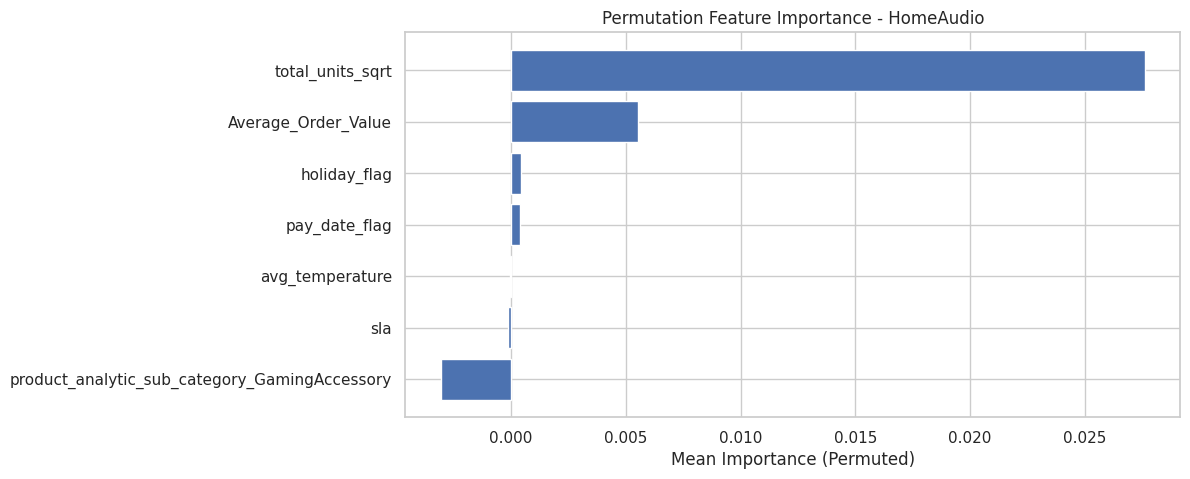

In [596]:
# 2. HomeAudio (model_aud)
print("Calculating Permutation Importance for HomeAudio...")
result_aud = permutation_importance(
    model_aud,
    X_test,  # Replace with your X_test data for HomeAudio
    y_test,  # Replace with your y_test data for HomeAudio
    n_repeats=10,
    random_state=42,
    scoring=keras_model_scorer
)

# Plotting
perm_sorted_idx_aud = result_aud.importances_mean.argsort()
plt.figure(figsize=(10, 5))
plt.barh(range(X_test.shape[1]), result_aud.importances_mean[perm_sorted_idx_aud])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx_aud])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance - HomeAudio')
plt.show()

## 5. Prepare the data for GamingAccessory

In [591]:
X_gam = final_df.drop(columns=["total_gmv_sqrt","week_start_date","product_analytic_sub_category_CameraAccessory","product_analytic_sub_category_HomeAudio"], axis=1)
y_gam = final_df["total_gmv_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X_gam, y_gam, test_size=0.2, random_state=42)

In [592]:
input_shape = X_train.shape[1:]  # Input shape for the model
model_gam = build_model(input_shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history_gam = model_gam.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, verbose=1,callbacks=[early_stopping])

# Evaluate the model
loss_gam, mae_gam, mse_gam = model_gam.evaluate(X_test, y_test, verbose=0)
print("GamingAccessory - Testing set Mean Abs Error: {:.2f} ".format(mae_gam))
print("GamingAccessory - Testing set Mean Squared Error: {:.2f}".format(mse_gam))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.2002 - mae: 0.4040 - mse: 0.2002 - val_loss: 0.0479 - val_mae: 0.2043 - val_mse: 0.0479
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0787 - mae: 0.2506 - mse: 0.0787 - val_loss: 0.0286 - val_mae: 0.1173 - val_mse: 0.0286
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0472 - mae: 0.1672 - mse: 0.0472 - val_loss: 0.0373 - val_mae: 0.1300 - val_mse: 0.0373
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0693 - mae: 0.2056 - mse: 0.0693 - val_loss: 0.0269 - val_mae: 0.1009 - val_mse: 0.0269
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0362 - mae: 0.1370 - mse: 0.0362 - val_loss: 0.0184 - val_mae: 0.0909 - val_mse: 0.0184
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0302 - mae: 0.1355 - mse: 0.0302 - val_loss: 0.0162 - val_mae: 0.1051 - val_mse: 0.0162
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0322 - mae: 0.1435 - mse: 0.0322 - val_loss: 

Calculating Permutation Importance for GamingAccessory...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

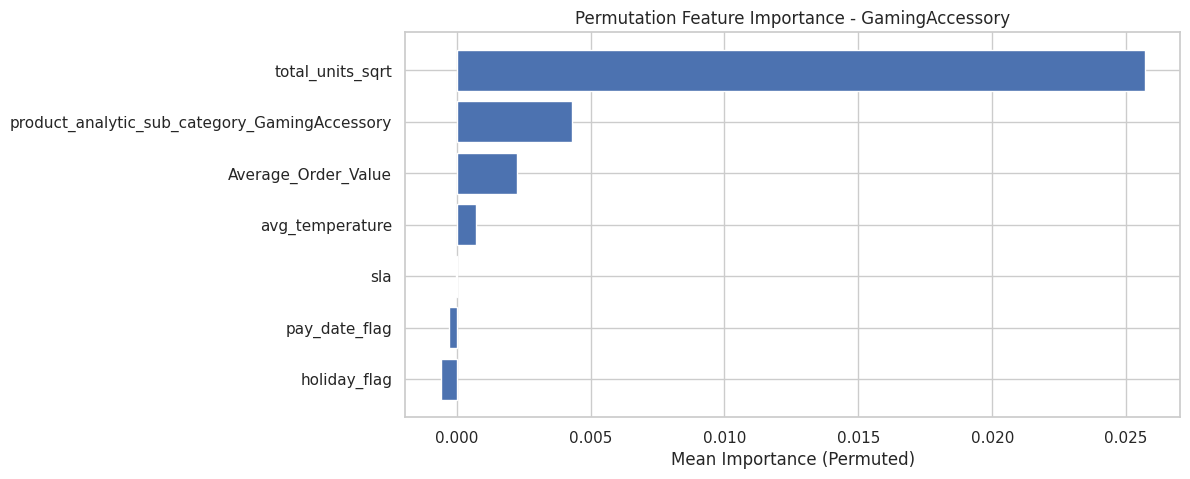

In [593]:
# 3. GamingAccessory (model_gam)
print("Calculating Permutation Importance for GamingAccessory...")
result_gam = permutation_importance(model_gam, X_test,  y_test, n_repeats=10,random_state=42,scoring=keras_model_scorer)

# Plotting
perm_sorted_idx_gam = result_gam.importances_mean.argsort()
plt.figure(figsize=(10, 5))
plt.barh(range(X_test.shape[1]), result_gam.importances_mean[perm_sorted_idx_gam])
plt.yticks(range(X_test.shape[1]), X_test.columns[perm_sorted_idx_gam])
plt.xlabel('Mean Importance (Permuted)')
plt.title('Permutation Feature Importance - GamingAccessory')
plt.show()

**Deep Learning Model**

- **Architecture:** A sequential model with dense layers is used. This architecture is suitable for regression tasks like predicting sales.
- **Activation Function:** ReLU is used for hidden layers to introduce non-linearity, which allows the model to learn more complex patterns.
- **Optimizer:** Adam is a common optimization algorithm for deep learning models. It helps adjust model weights efficiently during training.
- **Loss Function:** Mean Squared Error (MSE) is a suitable loss function for regression problems as it penalizes larger errors more heavily.
- **Metrics:** MAE and MSE are used for evaluation. MAE provides a measure of the average absolute prediction error, while MSE measures the average squared prediction error.
- **Early Stopping:** To avoid overfitting, an early stopping mechanism is implemented. This monitors the model's performance on a validation set and stops training when performance starts to decline, ensuring the model generalizes well to unseen data.
- **Dropout:** Dropout layers are introduced to prevent overfitting by randomly dropping neurons during training. This helps the model learn more robust features.